# Spatial: Error Analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import to_prob_dist

In [19]:
test = pd.read_csv('../dataset/spatial/test.csv', index_col=0)

{s: int(p * 100) for s, p in to_prob_dist(
    test['scene'].value_counts().to_dict()).items()}

{'kitchen': 42, 'living_room': 34, 'bathroom': 12, 'bedroom': 7, 'office': 2}

In [22]:
MODEL = 'vilt'
pred = pd.read_csv(f'../temp/{MODEL}_spt.csv')

test.shape, pred.shape

((4599, 8), (4599, 3))

In [23]:
df = pd.DataFrame()

pred['pred'] = pred['pred'].apply(lambda x: str(x))
df['correct'] = pred.apply(lambda x: x['pred'] in x['true'], axis=1)
df['scene'] = test['scene']

df.groupby(['scene'])['correct'].mean().to_dict()

{'bathroom': 0.5324232081911263,
 'bedroom': 0.6308139534883721,
 'kitchen': 0.6749492900608519,
 'living_room': 0.7129337539432177,
 'office': 0.5089285714285714}

<br>

### Scene-wise

In [24]:
vilt = {'bathroom': 0.5324232081911263,
        'bedroom': 0.6308139534883721,
        'kitchen': 0.6749492900608519,
        'living_room': 0.7129337539432177,
        'office': 0.5089285714285714}

bert = {'bathroom': 0.5716723549488054,
        'bedroom': 0.6627906976744186,
        'kitchen': 0.6678498985801217,
        'living_room': 0.7205047318611988,
        'office': 0.49107142857142855}

capb = {'bathroom': 0.6126279863481229,
        'bedroom': 0.7558139534883721,
        'kitchen': 0.7003042596348884,
        'living_room': 0.7318611987381703,
        'office': 0.5}


SCORE = {'vilt': 65.78, 'bert': 67.25, 'capb': 69.93}

In [25]:
def _scale(arr, by=100):
    return [_ * by for _ in arr]

labels = list(bert)
vilt = _scale(list(vilt.values()))
bert = _scale(list(bert.values()))
capb = _scale(list(capb.values()))

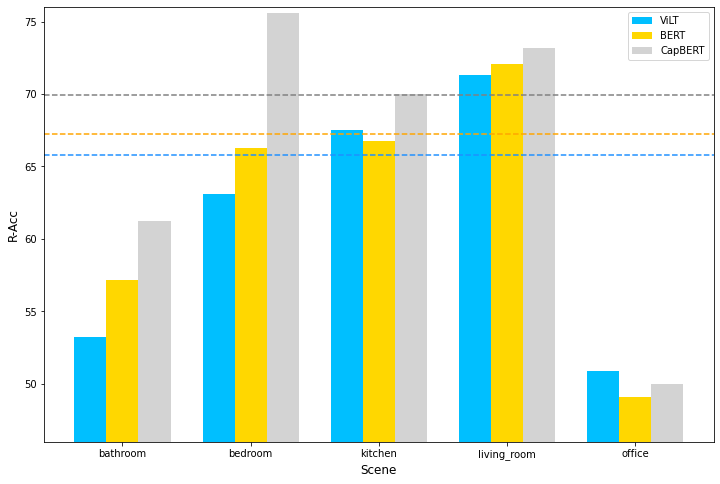

In [32]:
barWidth = 0.25
fig = plt.subplots(figsize=(12, 8))

br1 = list(range(len(bert)))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2 ]

plt.bar(br1, vilt, color='deepskyblue', width=barWidth, label='ViLT')
plt.bar(br2, bert, color='gold', width=barWidth, label='BERT')
plt.bar(br3, capb, color='lightgray', width=barWidth, label='CapBERT')

plt.axhline(y=SCORE['vilt'], linestyle='--', color='dodgerblue')
plt.axhline(y=SCORE['bert'], linestyle='--', color='orange')
plt.axhline(y=SCORE['capb'], linestyle='--', color='gray')

plt.xlabel('Scene', fontsize=12)
plt.ylabel('R-Acc', fontsize=12)

plt.xticks([r + barWidth for r in range(len(bert))], labels)
plt.ylim([46, 76])

plt.legend()
# plt.show()
plt.savefig('./spatial_scene_wise.pdf', bbox_inches='tight')

<br>

## Δy
